# D209 Data Mining I Performance Assessment, Task \# 1

Submitted by William J Townsend, Student ID 003397146, for WGU's MSDA program

## Table of Contents
<ul>
<li><a href="#PartA1">A1: Research Question</a></li>
<li><a href="#PartA2">A2: Objectives and Goals of Analysis</a></li>
<li><a href="#PartB1">B1: Justification of Classification Method</a></li>
<li><a href="#PartB2">B2: Assumptions of a KNN Classification Model</a></li>
<li><a href="#PartB3">B3: Benefits of Chosen Tools</a></li> 
<li><a href="#PartC1">C1: Data Preparation Goals and Necessary Manipulation</a></li>
<li><a href="#PartC2">C2: Variable Selection \& Identification</a></li>
<li><a href="#PartC3">C3: Preparation of Data</a></li>
<li><a href="#PartC4">C4: Copy of Prepared Data Set</a></li>
<li><a href="#PartD1">D1: Data Splitting, Copy of Split Data</a></li>
<li><a href="#PartD2">D2: Analysis Description</a></li>
<li><a href="#PartD3">D3: Classification Analaysis Code</a></li>
<li><a href="#PartE1">E1: Accuracy of Classification Model</a></li> 
<li><a href="#PartE2">E2: Model Results</a></li> 
<li><a href="#PartE3">E3: Classification Limitations</a></li>
<li><a href="#PartE4">E4: Recommended Action</a></li>
<li><a href="#PartF">F: Panopto Recording</a></li>
<li><a href="#PartG">G: Code References</a></li>
<li><a href="#PartH">H: Source References</a></li>    
</ul>

<a id='PartA1'></a>
## A1: Research Question

The research question that I want to examine is, "Which factors most significantly contribute or relate to patients diagnosed with chronic back pain?" This is a broad topic, but chronic back pain is a problem for many Americans. Any hospital or healthcare system has to meet its' customers where they are, and this includes whatever ailments they have, and understanding how various ailments or health data relate to each other, even if not specifically causal in nature, is important. Part of the reason that I want to explore this is because when I researched the same question in my Task 2 PA for D208, my logistic regression model was not particularly effective. It almost exclusively predicted patients to not have back pain, earning an accuracy rate that roughly mirrored the proportion of patients with chronic back pain to those without. I want to use K-Nearest Neighbors classification to try to create a new model that improves upon that logistic regression model. 

<a id="#PartA2"></a>
## A2: Objectives and Goals of Analysis

As mentioned, the logistic regression model that I developed in D208 was no more accurate than simply declaring every patient to not have diagnosed chronic back pain. As such, this project will be borrowing heavily from my submission for D208's second Performance Assessment. The goal of this analysis would be to determine if a more effective model could be developed using KNN classification. Understanding how various ailments relate to each other, even if not specifically causal in nature, is important to both the customer and to the hospital, in that it provides insight into the individual's healthcare situation, including managing their current health issues and mitigating risks for new issues. The management of those current issues or mitigation of potential future issues is precisely the business of the hospital, and proactive and effective management of those concerns can help lead to better outcomes for currently hospitalized patients, while preventing tomorrow's issues, such as a patient's current hospitalization being extended, being re-hospitalized for the same issue, or even avoiding a future hospitalization for a potential complication or health risk which was avoided.

<a id="#PartB1"></a>
## B1: Justification of Classification Method

K-Nearest Neighbors (KNN) classification is a process which maps datapoints according to their features and their labels. When a new datapoint is encountered whose label is unknown, KNN then surveys a certain number ('k') of the nearest neighboring datapoints to that unknown datapoint. Surveying these neighboring datapoints amounts to a "vote" of sorts, to determine a label for the datapoint whose label was unknown. In this way, each unlabelled datapoint has a label predicted for it, following the established patterns of the dataset for which labels were known. 

The number of neighboring points can be modified and adjusted as necessary to create the most effective model, though k will remain constant throughout that model once selected. Determination of which neighboring datapoints are closest is generally done through standard Euclidean distance, calculating the length of a line segment between the datapoint of interest and other points in the figure. Other methods can be used instead, as noted in the [scikit learn documentation for KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). 

<a id="#PartB2"></a>
## B2: Assumptions of a KNN Classification Model

Perhaps the most important assumption of any KNN model, regardless of the context or what it is trying to classify, is that it assumes that similar things exist in some proximity to each other when plotted on a graph. This is because its core operation is surveying other nearby datapoints for their labels, and it depends upon those datapoints to be informative about what the unknown datapoint is. If this is not the case, the KNN model will fail to be effective because the neighbors will not be informative in classifying the unknown datapoint. 

<a id="#PartB3"></a>
## B3: Benefits of Chosen Tools

I will be using Python throughout this analysis project. Python is a programming language that supports data science processes very well, particularly in the use of packages designed specifically for this. Python also happens to be the only programming language that I know to any sort of significant degree. I'll also be using several Python packages to perform this analysis:
- pandas allows for the handling of the dataset in something like a large table or spreadsheet
  - pandas' CategoricalDtype lets me create columns which are categorical *and* ordinal in nature
- NumPy allows for performing certain mathematical operations or assignment of certain values within the dataset
- Seaborn and MatPlotLib provide graphing functionality
- SciPy's statsmodels API provides several important functionalities that we'll be calling upon
  - The Variance inflation factor function lets us calculate the VIF to determine if features have excessive multicollinearity
  - The Mosaic function lets us generate mosaic graphs for bivariate visualization of categorical datatypes
- sklearn also provides several functions that are required components for this analysis
  - The train_test_split function allows us to easily break up our dataset into training and testing portions
  - sklearn's preprocessing provides the use of several different functions for proprocessing our data
  - SelectKBest and the f_classif function allow us to determine the best features to use from 20+ that could go in the model
  - KNeighborsClassifier is the core of this analysis, as it is the classifier that will be used on our data
  - GridSearchCV will be used to determine the best value of 'k' for the KNeighborsClassifier
  - The confusion_matrix function will let me print a confusion matrix for the KNN model
  - roc_auc_score function will compute the Area Under the Curve (AUC) score for the KNN model
  - roc_curve will allow for plotting the Receiver Operating Characteristic (ROC) curve of the KNN model
  - classification_report provides an easy summary report of the metrics for the KNN model

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

# The CSV's first column is an index and Pandas will duplicate this and create an column without 'index_col=0'
df = pd.read_csv('./medical_clean.csv', index_col=0)
# Check data types and number of values, as well as overall size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [2]:
# Visually inspect dataframe to facilitate exploration, spot problems
pd.set_option("display.max_columns", None)
df.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


<a id="#PartC1"></a>
## C1: Data Preparation Goals and Necessary Manipulation

While there are several data preparation and cleaning steps that are going to be necessary here, one of them that will have to be performed for KNN classification is one hot encoding. One hot encoding represents categorical data by placing it into columns with integer values of 1 or 0 to communicate the same information in a numeric fashion. For example, the gender column contains values for Female, Male, and Nonbinary. Two columns can be created which will actually communicate the same information. If a 1 appears in the first column, then the patient is male. If a 1 appears in the second column, then the patient is nonbinary. If a 1 appears in neither column (both 0), then the patient is female. This can easily be done by using pandas' `get_dummies()` function. Representing this data in a numeric fashion allows our KNN classifier to handle the data, where it wouldn't have been able to understand what "male" meant. 

<a id="#PartC2"></a>
## C2: Variable Selection \& Identification

I will exclude the data regarding certain census data, as well as the survey opinions of patients, because these are not types of healthcare data. I intend to include the following features in my analysis:

- Categorical: Area (Rural, Suburban, Urban)
- Continuous: Number of Children
- Continuous: Age
- Categorical: Gender
- Categorical: Readmission
- Continuous: Vitamin D levels
- Continuous: Number of Dr Visits
- Continuous: Full meals
- Continuous: Number of Vitamin D supplements
- Categorical: Soft Drink Consumption
- Categorical: Initial Admission Reason (Observation, Elective, Emergency)
- Categorical: High Blood Pressure
- Categorical: Stroke
- Categorical: Complication Risk (Low, Medium, High)
- Categorical: Overweight
- Categorical: Categorical: Arthritis
- Categorical: Diabetes
- Categorical: Hyperlipidemia
- Categorical: Anxiety
- Categorical: Allergic Rhinitis
- Categorical: Asthma
- Categorical: Days hospitalized

<a id="#PartC3"></a>
## C3: Preparation of Data

First, I'll be cleaning up the data, applying [the same code that I used in D208 with this dataset](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=9ac55b7b-f61e-46da-bc56-af5c0034f1d7). Some of these fixes are unnecessary because they handle data that I won't be using, but since I have the code available, I'll use it. This code involves fixing things like turning zip codes into strings from integers, standardizing time zones, handling the ordinal categorical survey responses, and mapping the various binary categorical values to 1/0 from Yes/No or True/False. 

After the columns are fixed, I will explore the data by using functions like `describe()` and `value_counts()` to ensure the data is suitable for classification analysis. I already checked for nulls by using `info()` above. This process isn't strictly required by the rubric, but it does seem to be suggested, so I'll do so quickly. Once the data is known to be appropriate for our purposes, I will generate the columns of dummy values. I'll insert these dummy columns into the dataframe at the same point as the original columns, just because I'm used to this ordering after using this dataset for several projects in a row. With all of the necessary columns placed into the dataframe, I'll then drop the columns that I'm not using. I can then check the dataframe to verify that it looks as expected, for the changes that I've applied. 

After that, the feature set will be rescaled using sklearn's MinMaxScaler(). This is a transformation process where existing data is placed into the range of 0 - 1. This is done by subtracting the minimum value for that column from the current value, then dividing by the difference of the maximum from the minimum. This puts every feature onto the same scale, preventing any larger-scaled feature from dominating the model. 

After the feature set is scaled, I will identify the best features to use for the KNN classification by using SelectKBest, using code from [Dr. Elleh's Jul 12 2022 webinar in the WGU Courseware Resources](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=b73b6274-ef01-4d1b-a59f-aed100228a93). While I could choose to just take the best 'k' values, where I would arbitrarily choose the value of k, this seems like a more effective solution to examine the entire feature set and then identify the x variables that I want to keep by taking those with a p-value under 0.05. Finally, once the feature set is isolated by SelectKBest, I'll check the Variance Inflation Factor for each feature, to verify that no multicollinearity concerns exist amongst these variables, as demonstrated by a VIF > 10. 

In [3]:
# Convert column to string from int, then front-fill string with 0's to reach 5 chars
df['Zip'] = df['Zip'].astype("str").str.zfill(5)
# Convert column to category from string
df["Area"] = df["Area"].astype("category")
# Replace city-specific values with time-zone specific values
df.TimeZone.replace({
    # Puerto Rico does not observe DST, stays on Atlantic Standard Time all year long
    "America/Puerto_Rico" : "US - Puerto Rico",
    # US - Eastern observes DST
    "America/New_York": "US - Eastern",
    "America/Detroit" : "US - Eastern",
    "America/Indiana/Indianapolis" : "US - Eastern",
    "America/Indiana/Vevay" : "US - Eastern",
    "America/Indiana/Vincennes" : "US - Eastern",
    "America/Kentucky/Louisville" : "US - Eastern",
    "America/Toronto" : "US - Eastern",
    "America/Indiana/Marengo" : "US - Eastern",
    "America/Indiana/Winamac" : "US - Eastern",
    # US - Central observes DST
    "America/Chicago" : "US - Central", 
    "America/Menominee" : "US - Central",
    "America/Indiana/Knox" : "US - Central",
    "America/Indiana/Tell_City" : "US - Central",
    "America/North_Dakota/Beulah" : "US - Central",
    "America/North_Dakota/New_Salem" : "US - Central",
    # US - Mountain observes DST
    "America/Denver" : "US - Mountain",
    "America/Boise" : "US - Mountain",
    # Arizona does not observe DST, stays on Mountain Standard Time all year long
    "America/Phoenix" : "US - Arizona",
    # US - Pacific observes DST
    "America/Los_Angeles" : "US - Pacific",
    # US - Alaskan observes DST
    "America/Nome" : "US - Alaskan",
    "America/Anchorage" : "US - Alaskan",
    "America/Sitka" : "US - Alaskan",
    "America/Yakutat" : "US - Alaskan",
    # US - Aleutian observes DST
    "America/Adak" : "US - Aleutian",
    # US - Hawaiian does not observe DST, stays on Hawaii Standard Time all year
    "Pacific/Honolulu" : "US - Hawaiian" 
    }, inplace=True)
# Convert column to category from string
df["TimeZone"] = df["TimeZone"].astype("category")
# Reformat column representing currency in USD to 3 decimal places from 6
df["Income"] = df["Income"].astype(int)
# Convert column to category from string
df["Marital"] = df["Marital"].astype("category")
# Convert column to category from string
df["Gender"] = df["Gender"].astype("category")
# Recast object > boolean wants to turn everything True, need to map Yes/No to True/False
bool_mapping = {"Yes" : 1, "No" : 0}
# Convert column to boolean from string
df["ReAdmis"] = df["ReAdmis"].map(bool_mapping)
# Convert column to boolean from string
df["Soft_drink"] = df["Soft_drink"].map(bool_mapping)
# Convert column to category from string
df["Initial_admin"] = df["Initial_admin"].astype("category")
# Convert column to boolean from string
df["HighBlood"] = df["HighBlood"].map(bool_mapping)
# Convert column to boolean from string
df["Stroke"] = df["Stroke"].map(bool_mapping)
# Convert column to category from string
df["Complication_risk"] = df["Complication_risk"].astype("category")
# Convert column to boolean from string
df["Overweight"] = df["Overweight"].map(bool_mapping)
# Convert column to boolean from string
df["Arthritis"] = df["Arthritis"].map(bool_mapping)
# Convert column to boolean from string
df["Diabetes"] = df["Diabetes"].map(bool_mapping)
# Convert column to boolean from string
df["Hyperlipidemia"] = df["Hyperlipidemia"].map(bool_mapping)
# Convert column to boolean from string
df["BackPain"] = df["BackPain"].map(bool_mapping)
# Convert column to boolean from string
df["Anxiety"] = df["Anxiety"].map(bool_mapping)
# Convert column to boolean from string
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].map(bool_mapping)
# Convert column to boolean from string
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].map(bool_mapping)
# Convert column to boolean from string
df["Asthma"] = df["Asthma"].map(bool_mapping)
# Convert column to category from string
df["Services"] = df["Services"].astype("category")
# Reformat column representing currency in USD to 3 decimal places from 6
df["TotalCharge"] = df.TotalCharge.round(3)
# Reformat column representing currency in USD to 3 decimal places from 6
df["Additional_charges"] = df.Additional_charges.round(3)
# Establish map for reversing survey questions to reflect a truth where 1 < 8 (currently the reverse)
survey_mapping = {1: 8, 2: 7, 3 : 6, 4: 5, 5: 4, 6: 3, 7 : 2, 8 : 1}
# Establish ordered categorical datatype structure ("1" < "2" < ... < "7" < "8") for survey response columns
survey_scores = CategoricalDtype(categories=["1", "2", "3", "4", "5", "6", "7", "8"], ordered=True)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item1"] = df["Item1"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item1"] = df["Item1"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item1"] = df["Item1"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item2"] = df["Item2"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item2"] = df["Item2"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item2"] = df["Item2"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item3"] = df["Item3"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item3"] = df["Item3"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item3"] = df["Item3"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item4"] = df["Item4"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item4"] = df["Item4"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item4"] = df["Item4"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item5"] = df["Item5"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item5"] = df["Item5"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item5"] = df["Item5"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item6"] = df["Item6"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item6"] = df["Item6"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item6"] = df["Item6"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item7"] = df["Item7"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item7"] = df["Item7"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item7"] = df["Item7"].astype(survey_scores)
# Remap column to reflect 1 < 8, rather than 1 > 8
df["Item8"] = df["Item8"].map(survey_mapping)
# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item8"] = df["Item8"].map(str)
# Reassign datatype from strings to created survey_scores datatype 
df["Item8"] = df["Item8"].astype(survey_scores)
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,US - Central,"Psychologist, sport and exercise",1,53,86575,Divorced,Male,0,19.141466,6,0,0,0,Emergency Admission,1,0,Medium,0,1,1,0,1,1,1,0,1,Blood Work,10.585770,3726.703,17939.403,6,6,7,7,5,6,6,5
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,US - Central,Community development worker,3,51,46805,Married,Female,0,18.940352,4,2,1,0,Emergency Admission,1,0,High,1,0,0,0,0,0,0,1,0,Intravenous,15.129562,4193.190,17612.998,6,5,6,5,5,5,6,6
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,US - Central,Chief Executive Officer,3,53,14370,Widowed,Female,0,18.057507,4,1,0,0,Elective Admission,1,0,Medium,1,0,1,0,0,0,0,0,0,Blood Work,4.772177,2434.234,17505.192,7,5,5,5,6,5,6,6
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,US - Central,Early years teacher,0,78,39741,Married,Male,0,16.576858,4,1,0,0,Elective Admission,0,1,Medium,0,1,0,0,0,0,0,1,1,Blood Work,1.714879,2127.830,12993.437,6,4,4,6,5,4,4,4
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,US - Eastern,Health promotion specialist,1,22,1209,Widowed,Female,0,17.439069,5,0,2,1,Elective Admission,0,0,Low,0,0,0,1,0,0,1,0,0,CT Scan,1.254807,2113.073,3716.526,7,8,6,6,4,6,5,6


In [4]:
df.Area.value_counts()

Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64

In [5]:
df.Children.value_counts().sort_index()

0     2548
1     2509
2     1475
3     1489
4      995
5      169
6      191
7      213
8      209
9      108
10      94
Name: Children, dtype: int64

In [6]:
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [7]:
df.Gender.value_counts()

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

In [8]:
df.ReAdmis.value_counts()

0    6331
1    3669
Name: ReAdmis, dtype: int64

In [9]:
df.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [10]:
df.Doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [11]:
df.Full_meals_eaten.describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

In [12]:
df.vitD_supp.describe()

count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: vitD_supp, dtype: float64

In [13]:
df.Soft_drink.value_counts()

0    7425
1    2575
Name: Soft_drink, dtype: int64

In [14]:
df.Initial_admin.value_counts().sort_index()

Elective Admission       2504
Emergency Admission      5060
Observation Admission    2436
Name: Initial_admin, dtype: int64

In [15]:
df.HighBlood.value_counts()

0    5910
1    4090
Name: HighBlood, dtype: int64

In [16]:
df.Stroke.value_counts()

0    8007
1    1993
Name: Stroke, dtype: int64

In [17]:
df.Complication_risk.value_counts().sort_index()

High      3358
Low       2125
Medium    4517
Name: Complication_risk, dtype: int64

In [18]:
df.Overweight.value_counts()

1    7094
0    2906
Name: Overweight, dtype: int64

In [19]:
df.Arthritis.value_counts()

0    6426
1    3574
Name: Arthritis, dtype: int64

In [20]:
df.Diabetes.value_counts()

0    7262
1    2738
Name: Diabetes, dtype: int64

In [21]:
df.Hyperlipidemia.value_counts()

0    6628
1    3372
Name: Hyperlipidemia, dtype: int64

In [22]:
df.Anxiety.value_counts()

0    6785
1    3215
Name: Anxiety, dtype: int64

In [23]:
df.Allergic_rhinitis.value_counts()

0    6059
1    3941
Name: Allergic_rhinitis, dtype: int64

In [24]:
df.Reflux_esophagitis.value_counts()

0    5865
1    4135
Name: Reflux_esophagitis, dtype: int64

In [25]:
df.Asthma.value_counts()

0    7107
1    2893
Name: Asthma, dtype: int64

In [26]:
df.Initial_days.describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [27]:
df.Initial_days.nlargest(n=20)

CaseOrder
7969    71.98149
5327    71.96869
7480    71.96546
6167    71.96415
8067    71.96342
5875    71.96164
5830    71.96134
9160    71.95813
8818    71.95472
7525    71.94732
9075    71.94459
7840    71.92930
9678    71.92647
9222    71.92413
5163    71.92171
9102    71.90712
9767    71.90694
5375    71.90056
6602    71.89863
7215    71.89805
Name: Initial_days, dtype: float64

In [28]:
df.Initial_days.nsmallest(n=20)

CaseOrder
1748    1.001981
2509    1.008401
4996    1.009143
4427    1.010068
4818    1.012481
15      1.012586
2554    1.013973
4251    1.014903
2237    1.016185
1127    1.016258
3868    1.021004
3328    1.021594
193     1.028205
105     1.032976
185     1.035656
947     1.036510
2781    1.038546
2201    1.039236
4213    1.042379
2377    1.043183
Name: Initial_days, dtype: float64

In [29]:
# Generate column names which are pythonic in syntax and descriptive
pythonic_columns = ["customer_id", "interaction", "uid", "city", "state", "county", 
                    "zip_code", "latitude", "longitude", "population", "area_type", "timezone", "job", "children", 
                    "age", "income", "marital_status", "gender", "readmission", 
                    "vitamin_d_level", "dr_visits", "full_meals", "vit_d_supp", "soft_drink", "initial_admit", 
                    "high_bp", "stroke", "complication_risk", "overweight", "arthritis", "diabetes", "hyperlipidemia", 
                    "back_pain", "anxiety", "allergic_rhinitis", "reflux_esophagitis", "asthma", "services", 
                    "days_hospitalized", "daily_charge", "addl_charge", "surv1_timely_admit", "surv2_timely_treat", 
                    "surv3_timely_visit", "surv4_reliable", "surv5_options", "surv6_hours", "surv7_courteous", 
                    "surv8_dr_listen"]
# Implement new pythonic column headings
df.set_axis(pythonic_columns, axis=1, inplace=True)
# Generate columns of dummy values for dataframe's Area column
area_temp_df = pd.get_dummies(data=df["area_type"], drop_first=True)
# Generate columns of dummy values for dataframe's Gender column
gender_temp_df = pd.get_dummies(data=df["gender"], drop_first=True)
# Generate columns of dummy values for dataframe's Initial_admin column
initial_admit_temp_df = pd.get_dummies(data=df["initial_admit"], drop_first=True)
# Generate columns of dummy values for dataframe's Complication_risk column
comp_risk_temp_df = pd.get_dummies(data=df["complication_risk"], drop_first=True)
# Insert the generated dummy variables to new dataframe, placing them in the same order as the original dataframe
# Dummies for Complication Risk
df.insert(27, "comp_risk_medium", comp_risk_temp_df.Medium)
df.insert(27, "comp_risk_low", comp_risk_temp_df.Low)
# Dummies for Initial Admit
df.insert(24, "initial_admit_emerg", initial_admit_temp_df["Emergency Admission"])
df.insert(24, "initial_admit_observ", initial_admit_temp_df["Observation Admission"])
# Dummies for Gender
df.insert(17, "gender_nonbinary", gender_temp_df.Nonbinary)
df.insert(17, "gender_male", gender_temp_df.Male)
# Dummies for Area
df.insert(10, "area_urban", area_temp_df.Urban)
df.insert(10, "area_suburban", area_temp_df.Suburban)
# Drop undesired columns
df.drop(["customer_id", "interaction", "uid", "city", "state", "county", "zip_code", "latitude", "longitude", "population", "area_type", "timezone", "job", "income", "marital_status", "gender", "initial_admit", "complication_risk", "services", "daily_charge", "addl_charge", "surv1_timely_admit", "surv2_timely_treat", "surv3_timely_visit", "surv4_reliable", "surv5_options", "surv6_hours", "surv7_courteous", "surv8_dr_listen"], axis=1, inplace=True)
# Check resulting dataframe
df.head()

,area_suburban,area_urban,children,age,gender_male,gender_nonbinary,readmission,vitamin_d_level,dr_visits,full_meals,vit_d_supp,soft_drink,initial_admit_observ,initial_admit_emerg,high_bp,stroke,comp_risk_low,comp_risk_medium,overweight,arthritis,diabetes,hyperlipidemia,back_pain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,days_hospitalized
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,53,1,0,0,19.141466,6,0,0,0,0,1,1,0,0,1,0,1,1,0,1,1,1,0,1,10.585770
2,0,1,3,51,0,0,0,18.940352,4,2,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,15.129562
3,1,0,3,53,0,0,0,18.057507,4,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,4.772177
4,1,0,0,78,1,0,0,16.576858,4,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,1.714879
5,0,0,1,22,0,0,0,17.439069,5,0,2,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1.254807


In [30]:
# Separate the X variables (explanatory) from the Y variable (response) into different dataframes
df_X = df.drop(["back_pain"], axis=1).copy()
df_y = df["back_pain"].copy()

In [31]:
# Standardize the X variables (explanatory) to put all on the same scale for KNN to measure distance
df_X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_X), columns=df_X.columns)
df_X

,area_suburban,area_urban,children,age,gender_male,gender_nonbinary,readmission,vitamin_d_level,dr_visits,full_meals,vit_d_supp,soft_drink,initial_admit_observ,initial_admit_emerg,high_bp,stroke,comp_risk_low,comp_risk_medium,overweight,arthritis,diabetes,hyperlipidemia,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,days_hospitalized
0,1.0,0.0,0.1,0.492958,1.0,0.0,0.0,0.562756,0.625,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.135022
1,0.0,1.0,0.3,0.464789,0.0,0.0,0.0,0.550632,0.375,0.285714,0.2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.199037
2,1.0,0.0,0.3,0.492958,0.0,0.0,0.0,0.497410,0.375,0.142857,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.053117
3,1.0,0.0,0.0,0.845070,1.0,0.0,0.0,0.408150,0.375,0.142857,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.010044
4,0.0,0.0,0.1,0.056338,0.0,0.0,0.0,0.460128,0.500,0.000000,0.4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.003562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.0,0.2,0.098592,1.0,0.0,0.0,0.432505,0.375,0.285714,0.2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.712308
9996,0.0,1.0,0.4,0.971831,1.0,0.0,1.0,0.504615,0.500,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.953321
9997,0.0,0.0,0.3,0.380282,0.0,0.0,1.0,0.441440,0.375,0.285714,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.974256
9998,0.0,0.0,0.3,0.352113,1.0,0.0,1.0,0.609113,0.500,0.285714,0.2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.878492


In [32]:
df_y

CaseOrder
1        1
2        0
3        0
4        0
5        0
        ..
9996     0
9997     0
9998     0
9999     1
10000    0
Name: back_pain, Length: 10000, dtype: int64

In [33]:
# Use SelectKBest to determine the best features to include in the model from the 27 columns we're starting with
feat_select = SelectKBest(f_classif, k='all')
feat_select.fit_transform(df_X, df_y)
feat_pvals = pd.DataFrame({'Feature' : df_X.columns, 'p_value' : feat_select.pvalues_}).sort_values('p_value') 
feat_pvals[feat_pvals['p_value'] < 0.05]

,Feature,p_value
3,age,0.035025
16,comp_risk_low,0.048173
5,gender_nonbinary,0.049955


In [34]:
# Check VIF for multicollinearity issues amongst these features
X = df[["age", "gender_nonbinary","comp_risk_low"]]

vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_df)

            feature       VIF
0               age  1.246507
1  gender_nonbinary  1.019317
2     comp_risk_low  1.227425


<a id="#PartC4"></a>
## C4: Copy of Prepared Data Set

The rubric isn't entirely clear if a copy of the entire dataset is wanted, or just the feature set that I've selected. I'm providing the entire data set here, as the feature set will be evident in the later copy of the training and test data. 

In [35]:
# Recombine df_X (feature set) and df_y (response variable) to save the whole thing in one dataframe
df = df_X.copy()
df.insert(22, column="back_pain", value=df_y.reset_index().drop('CaseOrder', axis=1))
# Save dataframe to CSV, ignore index (if included, this will create an additional unnecessary column)
df.to_csv('task1_full_clean.csv', index=False)

<a id="#PartD1"></a>
## D1: Data Splitting, Copy of Split Data

In [36]:
# Set X and y (standard sklearn variables) to equal the selected X features and the y response of interest
X = df_X[["age", "gender_nonbinary", "comp_risk_low"]].assign(const=1)
y = df_y
# Split the data into train and test sets, 80% train, 20% test, use stratify to maintain proportions across split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state = 42, stratify = y)

In [37]:
# Save each of the four data sets to CSV to satisfy rubric
X_train.to_csv('task1_Xtrain.csv', index=False)
X_test.to_csv('task1_Xtest.csv', index=False)
y_train.to_csv('task1_ytrain.csv', index=False)
y_test.to_csv('task1_ytest.csv', index=False)

<a id="#PartD2"></a>
## D2: Analysis Description

In order to perform a K-Nearest Neighbors classification, I have to decide on what is the appropriate value of 'k'. Using code provided as an example in the [DataCamp class material by Hugo Bowne-Anderson regarding hyperparameter tuning](https://campus.datacamp.com/courses/machine-learning-with-scikit-learn/fine-tuning-your-model?ex=9), we can use GridSearchCV to try multiple values for k and pick the one that provides the most accurate model. Once the best value for 'k' is determined, we can move forward with the KNN classification. The rubric requires that I provide the Area Under the Curve (AUC) score of my classification model, so I have generated this using code provided in the [DataCamp class material by Hugo Bowne-Anderson regarding AUC Computation](https://campus.datacamp.com/courses/machine-learning-with-scikit-learn/fine-tuning-your-model?ex=8). To visualize this performance, I'll also provide the ROC curve, generated with code from the [DataCamp class material by Hugo-Bowne-Anderson regarding plotting an ROC curve](https://campus.datacamp.com/courses/machine-learning-with-scikit-learn/fine-tuning-your-model?ex=5). 

In [38]:
# Determine what is the best number of neighbors to use for KNN classification, from values of k = 1 to k = 50
param_grid = {'n_neighbors' : np.arange(1, 50)}
# Instantiate the KNeighborsClassifier object
knn = KNeighborsClassifier()
# Instantiate the GridSearchCV object, searching across the provided parameter grid and 5 fold cross validation
knn_cv = GridSearchCV(knn, param_grid, cv=5)
# Fit to training data
knn_cv.fit(X_train, y_train)
# Find best parameter from GridSearchCV
knn_cv.best_params_

{'n_neighbors': 44}

In [39]:
# Find score of best parameter from GridSearchCV
knn_cv.best_score_

0.582375

The confusion matrix for this KNN model:
Predicted No Back Pain | Predicted Back Pain
                 [1089   88] Actual No Back Pain
                 [745  78] Actual Back Pain
The training accuracy of this KNN classification is 0.594125.
The testing accuracy of this KNN classification model is 0.5835.


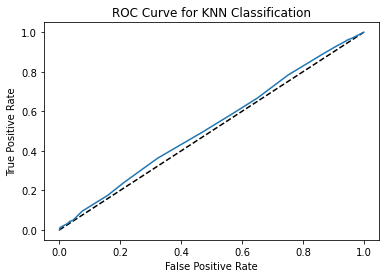

The Area Under the Curve (AUC) score is: 0.5232163448683815

              precision    recall  f1-score   support

           0       0.59      0.93      0.72      1177
           1       0.47      0.09      0.16       823

    accuracy                           0.58      2000
   macro avg       0.53      0.51      0.44      2000
weighted avg       0.54      0.58      0.49      2000



In [40]:
# Perform KNN using the value of k=44 from the above grid search
knn = KNeighborsClassifier(n_neighbors = 44)
# Fit to the training data
knn.fit(X_train, y_train)
# Generate y_pred array for model's confusion matrix
y_pred = knn.predict(X_test)
final_matrix = confusion_matrix(y_test, y_pred)
# Print confusion matrix and accuracy score of model
print("The confusion matrix for this KNN model:")
print("Predicted No Back Pain | Predicted Back Pain")
print(f"                 {final_matrix[0]} Actual No Back Pain")
print(f"                 {final_matrix[1]} Actual Back Pain")
print(f"The training accuracy of this KNN classification is {knn.score(X_train, y_train)}.")
print(f"The testing accuracy of this KNN classification model is {knn.score(X_test, y_test)}.")
# Generate AUC score and print
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classification')
plt.show()
print(f"The Area Under the Curve (AUC) score is: {roc_auc_score(y_test, y_pred_prob)}\n")
print(classification_report(y_test, y_pred))

K-Nearest Neighbors classification, as explained above in B1, maps datapoints with unknown labels according to their features and then determines a label by surveying the labels of the datapoints nearest to the unknown datapoint. The 'K' in KNN classification refers to how many of these neighbors are surveyed, and this value is dictated to the KNN classifier at the time that it is instantiated. While I could pick an arbitrary value to feed it, this value may not necessarily the best or most accurate. A better way to do this is to use hyperparameter tuning. This process lets me test different values for 'k' through a `GridSearchCV` across a given range, to determine which value of k is best. 

Across the range of 1 - 50, this process yielded a value of k=44. With this value decided, I could begin the KNN classification, generating the classifier and fitting it to my training data. I could then generate the list of predictions for the testing data that was held out, and use the results of this to generate a confusion matrix. The confusion matrix indicates that of the 2,000 observations in the testing portion of the dataset, it correctly classified 1167 of them (1089 + 78), while being incorrect about 833 (745 + 88). 

This represents an accuracy on the test data of 58.35%. We can plot a Receiver Operating Characteristic (ROC) curve, graphing the performance of the KNN classification model, to visualize this performance. On this graph, the center diagonal line represents classification performance if done completely randomly (50%). A curve below this line represents performance that is worse than random classification, while a curve above represents an improvement upon random classification. A curve reaching the top left corner of the plot area would be a perfect classifier (100% accurate). We can see that the curve for this classification model only slightly outperforms the line demonstrating a true random classification. This can be quantified with an Area Under the Curve (AUC) score, which is 0.5232 for this model. 

KNN classification does allow for weighting of neighbors by different methods. By default, all neighbors are weighed equally, though they could instead be weighted by the inverse of their distance or even by a user-defined function. This classification model used the default uniform weighting. KNN classification also allows for different algorithms to be used to calculate distance from the nearest neighbors. This classification used the default algorithm of brute force calculation of Euclidean distance. 

For comparison, the rate of No Back Pain across the entire dataset is 58.86%, as seen using `value_counts()` earlier. 

<a id="#PartD3"></a>
## D3: Classification Analysis Code

All of the code that was just performed above is replicated here, because the rubric requires this section to exist:

In [41]:
# Split the data into train and test sets, 80% train, 20% test, use stratify to maintain proportions across split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state = 42, stratify = y)
# Determine what is the best number of neighbors to use for KNN classification, from values of k = 1 to k = 50
param_grid = {'n_neighbors' : np.arange(1, 50)}
# Instantiate the KNeighborsClassifier object
knn = KNeighborsClassifier()
# Instantiate the GridSearchCV object, searching across the provided parameter grid and 5 fold cross validation
knn_cv = GridSearchCV(knn, param_grid, cv=5)
# Fit to training data
knn_cv.fit(X_train, y_train)
# Find best parameter from GridSearchCV
knn_cv.best_params_

{'n_neighbors': 44}

In [42]:
# Find score of best parameter from GridSearchCV
knn_cv.best_score_

0.582375

The confusion matrix for this KNN model:
Predicted No Back Pain | Predicted Back Pain
                 [1089   88] Actual No Back Pain
                 [745  78] Actual Back Pain
The training accuracy of this KNN classification is 0.594125.
The testing accuracy of this KNN classification model is 0.5835.


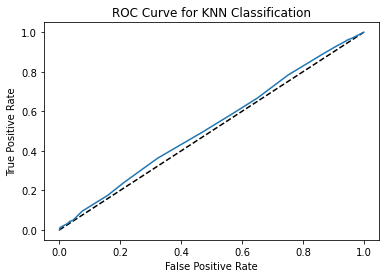

The Area Under the Curve (AUC) score is: 0.5232163448683815

              precision    recall  f1-score   support

           0       0.59      0.93      0.72      1177
           1       0.47      0.09      0.16       823

    accuracy                           0.58      2000
   macro avg       0.53      0.51      0.44      2000
weighted avg       0.54      0.58      0.49      2000



In [43]:
# Perform KNN using the value of k=44 from the above grid search
knn = KNeighborsClassifier(n_neighbors = 44)
# Fit to the training data
knn.fit(X_train, y_train)
# Generate y_pred array for model's confusion matrix
y_pred = knn.predict(X_test)
final_matrix = confusion_matrix(y_test, y_pred)
# Print confusion matrix and accuracy score of model
print("The confusion matrix for this KNN model:")
print("Predicted No Back Pain | Predicted Back Pain")
print(f"                 {final_matrix[0]} Actual No Back Pain")
print(f"                 {final_matrix[1]} Actual Back Pain")
print(f"The training accuracy of this KNN classification is {knn.score(X_train, y_train)}.")
print(f"The testing accuracy of this KNN classification model is {knn.score(X_test, y_test)}.")
# Generate AUC score and print
y_pred_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classification')
plt.show()
print(f"The Area Under the Curve (AUC) score is: {roc_auc_score(y_test, y_pred_prob)}\n")
print(classification_report(y_test, y_pred))

<a id="#PartE1"></a>
## E1: Accuracy of Classification Model

The entire reason that I wanted to construct this model is because the logistic regression model I'd created in D208 was only accurate to about 58%. This KNN classification model ended up with a very similar accuracy, just over 58%. However, its accuracy is largely bolstered by the majority of the data representing 0 (No Back Pain), with 41.14% of patients having been diagnosed with chronic back pain. The model lacks precision, having difficulty correctly classifying instances in which the patient does have back pain (1 in the above classification report).

As explained above, the ROC plot's central diagonal line represents a 50% correct classification rate, which would be expected of a completely random classification. A classifier's performance can be plotted onto this graph, with a curve below the diagonal reflecting a poor prediction rate (all the way to 0% correct predictions in the bottom right) while a curve above the diagonal reflects a good prediction rate (all the way up to 100% correct predictions in the top left). The Area Under the Curve (AUC) score is the percentage of the graph's area that is beneath the curve created by the classification model, where a perfect (100% correct) model would have an AUC of 1.0 and a completely wrong (0% correct) model would have an AUC of 0.0. This model has an AUC of 0.5232. This is slightly over 50%, which is consistent with the curve that we see plotted just over 50%. Both the plot and the AUC score demonstrate that this KNN model is only slightly better than random classification would be. 

<a id="#PartE2"></a>
## E2: Model Results

The model's AUC score indicates that it *is* more useful than random classification, but only slightly so. The poor precision of the model in particular indicates that it is not very good at predicting patients to have chronic back pain. A model which simply predicted every patient to not have chronic back pain (predicted probability = 0 for each observation) would be slightly worse than this model, as it would end up exactly on the diagonal line, with an AUC score of 0.5. This was the performance of my logistic regression model in D208, so in that sense, this KNN classification model *is* an improvement upon that logistic regression model. However, this classification model is still quite inaccurate and I'm disappointed by its overall performance.

<a id="#PartE3"></a>
## E3: Classification Limitations

In the assumptions of KNN classification covered in section B2, I noted that a KNN model "assumes that other similar things exist in some proximity to each other when plotted on a graph". This assumption is essential to the KNN classification process, because it depends on those "neighbors" to be of the same label as each datapoint it is trying to label. Given the poor results of this model, its clear that the occurrence of back pain among patients in the medical data set is distributed with enough randomness that neighboring datapoints lack similarity to each other to such a degree that KNN classification is only marginally useful. This significantly limits the usefulness of this analysis. 

<a id="#PartE4"></a>
## E4: Recommended Action

I've mentioned in previous analyses of the back pain variable in this dataset that most of the other variables here would not be intuitively expected to relate to back pain. Age and overweight would be the two that would stick out as potential factors that might relate to a diagnosis of chronic back pain, and children might be a substitute for age. This has not seemed to be the case across my analyses, or if these variables do have a relationship, it is slight. I would be curious to know if a dataset that more clearly relates to healthcare data, such as treatment types, initial complaint, patient weight, activity levels, etc. might be able to more accurately predict patients with chronic back pain. I would recommend that the hospital system expand their data gathering operations to collect more of this sort of data, which could be anonymized similar to the existing data to address patient privacy concerns. However, until such data becomes available, I would recommend that the hospital system's data analyst table the very poor model created here and give up on analyzing factors that contribute to patient back pain. 

<a id="#PartF"></a>
## F: Panopto Recording

My presentation of this performance assessment [can be viewed here, via Panopto.](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=f273f038-af83-4566-8331-af60017c5ba8) 

<a id="#PartG"></a>
## G: Code References

[William Townsend D208 Task 2 Performance Assessment Submission](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=9ac55b7b-f61e-46da-bc56-af5c0034f1d7) was used for the code to clean up and prepare the dataset.

[Dr. Elleh's Jul 12 2022 webinar in the WGU Courseware Resources](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=b73b6274-ef01-4d1b-a59f-aed100228a93) was used for assistance in using SelectKBest, specifically deciding how to pick my k value here. 

[DataCamp Class Material by Hugo Bowne-Anderson (Hyperparameter Tuning)](https://campus.datacamp.com/courses/machine-learning-with-scikit-learn/fine-tuning-your-model?ex=9) was used for the the code to find the best value of k for the actual KNN classification. 

[DataCamp class material by Hugo Bowne-Anderson (AUC Computation)](https://campus.datacamp.com/courses/machine-learning-with-scikit-learn/fine-tuning-your-model?ex=8) was used for the code explaining how to compute the AUC score for my KNN model. 

[DataCamp class material by Hugo Bowne-Anderson (Plotting an ROC Curve)](https://campus.datacamp.com/courses/machine-learning-with-scikit-learn/fine-tuning-your-model?ex=5) was used for the code to plot the ROC curve, to visualize the AUC score and the KNN model's performance. 

<a id="#PartH"></a>
## H: Source References

[Scikit learn documentation for KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) was used for research into the weights and algorithms underpinning KNN classification. 